In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bigmart = pd.read_csv('Train_BM.csv')
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
corr_mat = bigmart.corr()
corr_mat['Item_Outlet_Sales']

Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

In [4]:
bigmart_1 = bigmart.copy()
bigmart_1.drop('Item_Weight',axis=1,inplace=True)

In [5]:
bigmart_1.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

merge LF with Low Fat,low fat and reg with Regular

In [6]:
bigmart_1['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
bigmart_1['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
bigmart_1['Item_Fat_Content'].replace('reg','Regular',inplace=True)
bigmart_1.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [7]:
bigmart_1.Item_Identifier=bigmart_1.Item_Identifier.astype('category')
bigmart_1.Item_Fat_Content=bigmart_1.Item_Fat_Content.astype('category')
bigmart_1.Item_Type=bigmart_1.Item_Type.astype('category')
bigmart_1.Outlet_Identifier=bigmart_1.Outlet_Identifier.astype('category')
bigmart_1.Outlet_Establishment_Year=bigmart_1.Outlet_Establishment_Year.astype('int64')

bigmart_1.Outlet_Type=bigmart_1.Outlet_Type.astype('category')
bigmart_1.Outlet_Location_Type=bigmart_1.Outlet_Location_Type.astype('category')
bigmart_1.Outlet_Size=bigmart_1.Outlet_Size.astype('category')

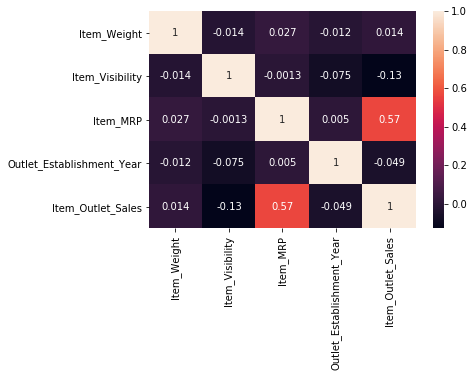

In [18]:
sns.heatmap(corr_mat,annot = True)

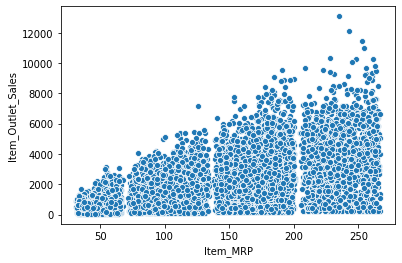

In [19]:
sns.scatterplot(y='Item_Outlet_Sales',x='Item_MRP',data=bigmart_1)